In [1]:
import numpy as np
from scipy.integrate import solve_ivp

In [2]:
import matplotlib.pyplot as plt

In [3]:
m1 = 2e30

In [4]:
m2 = 5.7e26
r2 = 60270
r12 = 1429*1e6
v2 = 9.7
m3 = 2.3e21
r3 = 764
r23 = 527e3
v3 = 7.54
# m2 = 6e24
# r2 = 6378.
# r12 = 150*1e6
# v2 = 30.
# m3 = 7.3e22
# r3 = 1737.
# r23 = 384e3
# v3 = 1.

In [5]:
g = 6.67430e-11/1e9

In [6]:
x1, y1 = 0, 0
vx1, vy1 = 0, 0

In [7]:
x2, y2 = r12, 0
x3, y3 = r12+r23, 0

In [8]:
vx2, vy2 = 0, v2
vx3, vy3 = 0, v2+v3

In [9]:
class planet:
    def __init__(self, m, r=1, x=0, y=0, vx=0, vy=0):
        self.m = m
        self.r = r
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy

    def coord(self):
        return np.array([self.x, self.y])

    def vel(self):
        return np.array([self.vx, self.vy])

In [10]:
def f_gr(p1: planet, p2: planet):
    dr = p2.coord - p1.coord

In [11]:
sun = planet(m1)
pl = planet(m2, r2, r12, 0, 0, v2)
sp = planet(m3, r3, r12+r23, 0, 0, v2+v3)

In [12]:
60*60*24*30*12

31104000

In [13]:

#n = 108_000 # 1 tick - 1 hour 24 * 4.5 * 1000
#for 1000 orbits
t_end = 60*60*24* 4.5 * 1000
n = 6_480_000 # n(upper) * 60
#for full planet cycle
#t_end = 60 * 60 * 24 * 10_759.0
#n  = 24 * 10_759 * 60
print(t_end, n) 
dt = t_end / n 

388800000.0 6480000


Y:

```[y0, y1, y2, y3, y4,  y5,  y6,  y7, y8, y9, y10, y11]```

```[x1, y1, x2, y2, x3, y3, vx1, vy1, vx2, vy2, vx3, vy3]```

[vx1, vy1, vx2, vy2, vx3, vy3,

$G*[m2*(\frac {1} {((x1-x2)^2 + (y1-y2)^2)^(3/2)})*(x1-x2) + m3*(\frac {1} {((x3-x2)^2 + (y3-y2)^2)^(3/2)})*(x3-x2)]$, ...,

..., ...]

In [14]:
def system(t, y):
    # velocityes
    dydt0 = y[6] # vx1
    dydt1 = y[7] # vy1
    dydt2 = y[8] # vx2
    dydt3 = y[9] # vy2
    dydt4 = y[10] # vx3
    dydt5 = y[11] # vy3
    # equations
    dydt6 =  g*( m2*(y[2] - y[0])/((y[2] - y[0])**2+(y[3] - y[1])**2)**1.5 + m3*(y[4] - y[0])/((y[4] - y[0])**2+(y[5] - y[1])**2)**1.5 )
    dydt7 =  g*( m2*(y[3] - y[1])/((y[2] - y[0])**2+(y[3] - y[1])**2)**1.5 + m3*(y[5] - y[1])/((y[4] - y[0])**2+(y[5] - y[1])**2)**1.5 )
    dydt8 =  g*( m1*(y[0] - y[2])/((y[0] - y[2])**2+(y[1] - y[3])**2)**1.5 + m3*(y[4] - y[2])/((y[4] - y[2])**2+(y[5] - y[3])**2)**1.5 )
    dydt9 =  g*( m1*(y[1] - y[3])/((y[0] - y[2])**2+(y[1] - y[3])**2)**1.5 + m3*(y[5] - y[3])/((y[4] - y[2])**2+(y[5] - y[3])**2)**1.5 )
    dydt10 = g*( m1*(y[0] - y[4])/((y[0] - y[4])**2+(y[1] - y[5])**2)**1.5 + m2*(y[2] - y[4])/((y[2] - y[4])**2+(y[3] - y[5])**2)**1.5 )
    dydt11 = g*( m1*(y[1] - y[5])/((y[0] - y[4])**2+(y[1] - y[5])**2)**1.5 + m2*(y[3] - y[5])/((y[2] - y[4])**2+(y[3] - y[5])**2)**1.5 )
    return np.array([dydt0, dydt1, dydt2, dydt3, dydt4, dydt5, dydt6, dydt7, dydt8, dydt9, dydt10, dydt11])

In [15]:
init_cond = np.array([x1, y1, x2, y2, x3, y3, vx1, vy1, vx2, vy2, vx3, vy3])

In [16]:
t_span = (0, t_end)
print(t_span)

(0, 388800000.0)


In [17]:
n

6480000

In [18]:
y_cur = init_cond.copy()
t_cur = 0.
all_data = np.zeros((n, 12))

In [19]:
from tqdm import tqdm

In [20]:
for i in tqdm(range(n)):
    t_cur = t_end*(i+1)/n
    # Runge 4
    k1 = dt*system(t_cur, y_cur)
    k2 = dt*system(t_cur + dt/2, y_cur + k1/2)
    k3 = dt*system(t_cur + dt/2, y_cur + k2/2)
    k4 = dt*system(t_cur + dt, y_cur + k3)
    k = (k1 + 2 * k2 + 2 * k3 + k4)/6
    
    y_cur = y_cur + k
    all_data[i] = y_cur
        
print(all_data.shape)

  0%|          | 0/6480000 [00:00<?, ?it/s]

100%|██████████| 6480000/6480000 [04:43<00:00, 22847.77it/s]

(6480000, 12)


In [ ]:
temps = [1, 100, 500, 1000]
plt.figure(figsize=(8, 6))

for temp in temps:
    timestamp_cycle_start = temp - 1
    timestamp_cycle_end = temp -1
    timestamp_start = timestamp_cycle_start * 6_480 # 24 * 4.5
    timestamp_end = timestamp_cycle_end * 6_480 #24 * 4.5

    x1_values = all_data[timestamp_start:timestamp_end,0]
    y1_values = all_data[timestamp_start:timestamp_end,1]
    x2_values = all_data[timestamp_start:timestamp_end,2]
    y2_values = all_data[timestamp_start:timestamp_end,3]
    x3_values = all_data[timestamp_start:timestamp_end,4]
    y3_values = all_data[timestamp_start:timestamp_end,5]
    
    plt.plot(x3_values - x2_values, y3_values - y2_values, 'r', label=f'r3(t) orbit around r2(t) at time = {temp}')
    title = f't = difference'
    plt.title(title)
    plt.legend()
    plt.grid(True)
    #plt.savefig(f'./{title}')
    
plt.show()

In [21]:
temp = 1
timestamp_cycle_start = temp - 1
#changed to * 1000
timestamp_cycle_end = temp * 1000
timestamp_start = 0 #timestamp_cycle_start * 6_480 # 24 * 4.5
timestamp_end = 15492960 #timestamp_cycle_end * 6_480 #24 * 4.5

x1_values = all_data[timestamp_start:timestamp_end,0]
y1_values = all_data[timestamp_start:timestamp_end,1]
x2_values = all_data[timestamp_start:timestamp_end,2]
y2_values = all_data[timestamp_start:timestamp_end,3]
x3_values = all_data[timestamp_start:timestamp_end,4]
y3_values = all_data[timestamp_start:timestamp_end,5]


vx1_values = all_data[timestamp_start:timestamp_end,6]
vy1_values = all_data[timestamp_start:timestamp_end,7]
vx2_values = all_data[timestamp_start:timestamp_end,8]
vy2_values = all_data[timestamp_start:timestamp_end,9]
vx3_values = all_data[timestamp_start:timestamp_end,10]
vy3_values = all_data[timestamp_start:timestamp_end,11]

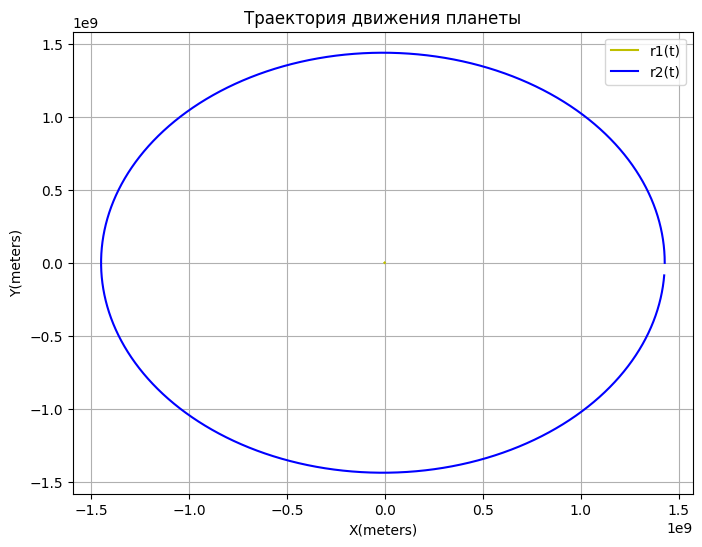

In [106]:
# Plot the solution
plt.figure(figsize=(8, 6))
plt.plot(x1_values, y1_values, 'y', label='r1(t)')
plt.plot(x2_values, y2_values, 'b', label='r2(t)')
#plt.plot(x3_values, y3_values, 'r', label='r3(t)')
plt.legend()
plt.grid(True)
plt.title('Траектория движения планеты')
plt.xlabel('X(meters)')
plt.ylabel('Y(meters)')
plt.legend()
plt.show()

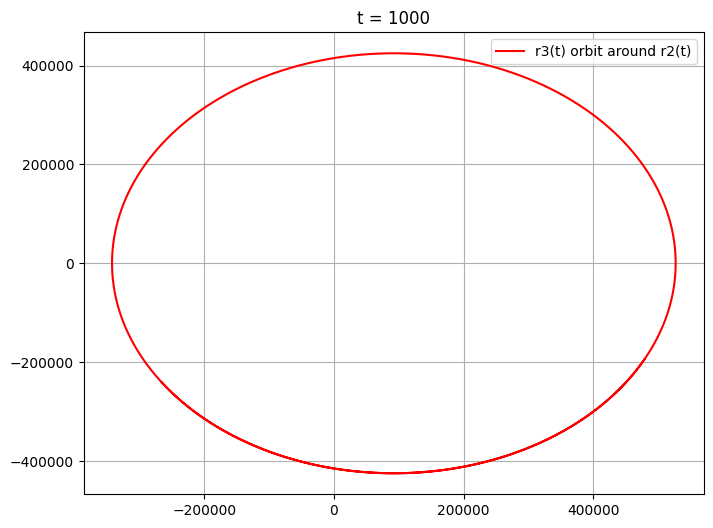

In [23]:
# Plot the solution
plt.figure(figsize=(8, 6))
#plt.plot(x2_values, y2_values, 'b', label='r2(t)')
plt.plot(x3_values - x2_values, y3_values - y2_values, 'r', label='r3(t) orbit around r2(t)')
title = f't = {temp}'
plt.title(title)
plt.legend()
plt.grid(True)
#plt.savefig(f'./{title}')
plt.show()

In [24]:
dt_min = 6_480
diff_x2_values = - all_data[0:1*dt_min,2] + all_data[999*dt_min:1000*dt_min,2]
diff_y2_values = - all_data[0:1*dt_min,3] + all_data[999*dt_min:1000*dt_min,3]
diff_x3_values = - all_data[0:1*dt_min,4] + all_data[999*dt_min:1000*dt_min,4]
diff_y3_values = - all_data[0:1*dt_min,5] + all_data[999*dt_min:1000*dt_min,5]

In [25]:
print(diff_x3_values.shape)

(6480,)


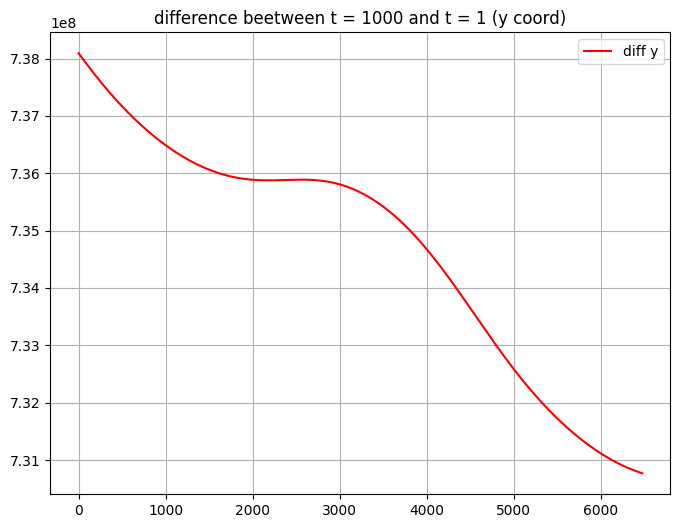

In [26]:
# Plot the solution
plt.figure(figsize=(8, 6))
#plt.plot(x2_values, y2_values, 'b', label='r2(t)')
#plt.plot(np.arange((len(diff_x3_values))), diff_x3_values, 'b', label='diff x')
plt.plot(np.arange((len(diff_y3_values))), diff_y3_values, 'r', label='diff y')
title = f'difference beetween t = 1000 and t = 1 (y coord)'
plt.title(title)
plt.legend()
plt.grid(True)
#plt.savefig(f'./{title}')
plt.show()

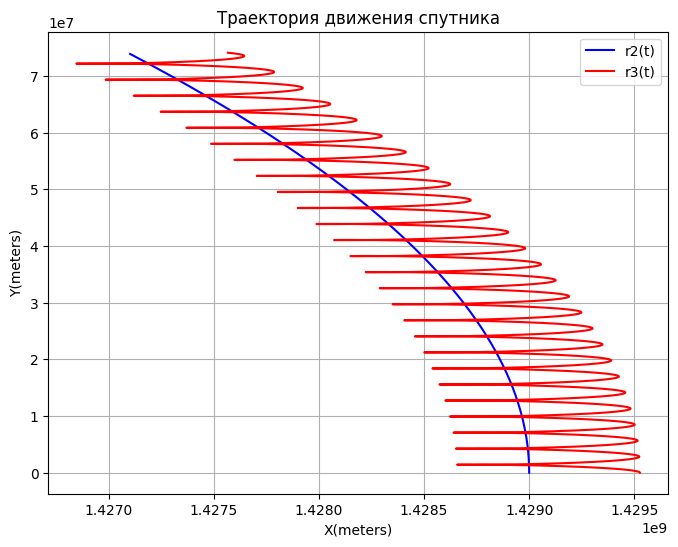

In [111]:
# Plot the solution
plt.figure(figsize=(8, 6))
sl_idx = 127_000
plt.plot(x2_values[:sl_idx]-x1_values[:sl_idx], y2_values[:sl_idx]-y1_values[:sl_idx], 'b', label='r2(t)')
plt.plot(x3_values[:sl_idx]-x1_values[:sl_idx], y3_values[:sl_idx]-y1_values[:sl_idx], 'r', label='r3(t)')
plt.legend()
plt.grid(True)
plt.title('Траектория движения спутника')
plt.xlabel('X(meters)')
plt.ylabel('Y(meters)')
#plt.savefig('./D3')
plt.show()

In [28]:
all_data[len(all_data) - 1]
x2 = all_data[len(all_data) - 1, 2]
y2 = all_data[len(all_data) - 1, 3]
x3 = all_data[len(all_data) - 1, 4]
y3 = all_data[len(all_data) - 1, 5]

print(x2 - x3, y2 - y3)

-478634.42606306076 194651.14887952805


In [29]:
import csv

with open('data.csv', 'w', newline='') as file:
    #writer = csv.writer(file, delimiter=',')
    #writer.writerow(all_data[len(all_data) - 1])
    pass

TASK 2

In [30]:
with open('data.csv', 'r', newline = '') as file:
    reader = csv.reader(file, delimiter=',')
    for row in reader:
        csv_data = row

In [31]:
print(csv_data)

['762626.9922968277', '865330.1808823458', '-1246873385.9190493', '735137832.5685462', '-1246394751.4929862', '734943181.4196666', '0.0013920805135270763', '0.005109934733025445', '-4.884487874833149', '-8.229520363211906', '-1.2775651722713104', '-1.39435617233732']


In [32]:
x1 = csv_data[0]
y1 = csv_data[1]
x2 = csv_data[2]
y2 = csv_data[3]
x3 = csv_data[4]
y3 = csv_data[5]

vx1 = csv_data[6]
vy1 = csv_data[7]
vx2 = csv_data[8]
vy2 = csv_data[9]
vx3 = csv_data[10]
vy3 = csv_data[11]